FRP

- mean, median, std, min, max for frp values for year and month

- total observations for year, month and day

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2001_2023.csv")

# Display the first few rows of the dataset to check the structure
df.head()

# Convert the 'acq_date' column to datetime format
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Extract the year, month, and day from the 'acq_date' column
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

# Display the dataset to ensure the new columns were added correctly
print(df.head())


   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0   35.0843    32.9085       328.6   1.8    1.3 2001-10-01       821   
1   35.1658    33.2584       326.9   1.7    1.3 2001-10-01       821   
2   50.9482    33.0974       301.7   2.9    1.6 2001-10-01       954   
3   51.2664    32.1443       301.4   2.5    1.5 2001-10-01       954   
4   51.2577    32.1782       303.6   2.5    1.5 2001-10-01       954   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          82     6.03       308.6  37.0        D     0   
1     Terra      MODIS          80     6.03       306.6  25.9        D     0   
2     Terra      MODIS          48     6.03       277.5  29.5        D     0   
3     Terra      MODIS          47     6.03       275.6  28.1        D     0   
4     Terra      MODIS          56     6.03       277.0  32.8        D     0   

   year  month  day  
0  2001     10    1  
1  2001     10    1  
2  2001     10    1 

In [31]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by year
yearly_stats = df.groupby('year')['frp'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Display the yearly statistics table
print(yearly_stats.head())


   year       mean  median         std  min     max
0  2001  18.984072    11.5   26.741410  0.0   494.3
1  2002  24.764621    13.6   51.031408  0.0  2863.6
2  2003  34.681924    13.5  110.745512  0.0  4694.2
3  2004  26.126656    13.1   73.547389  0.0  4692.7
4  2005  31.623783    13.6   87.596347  0.0  5873.1


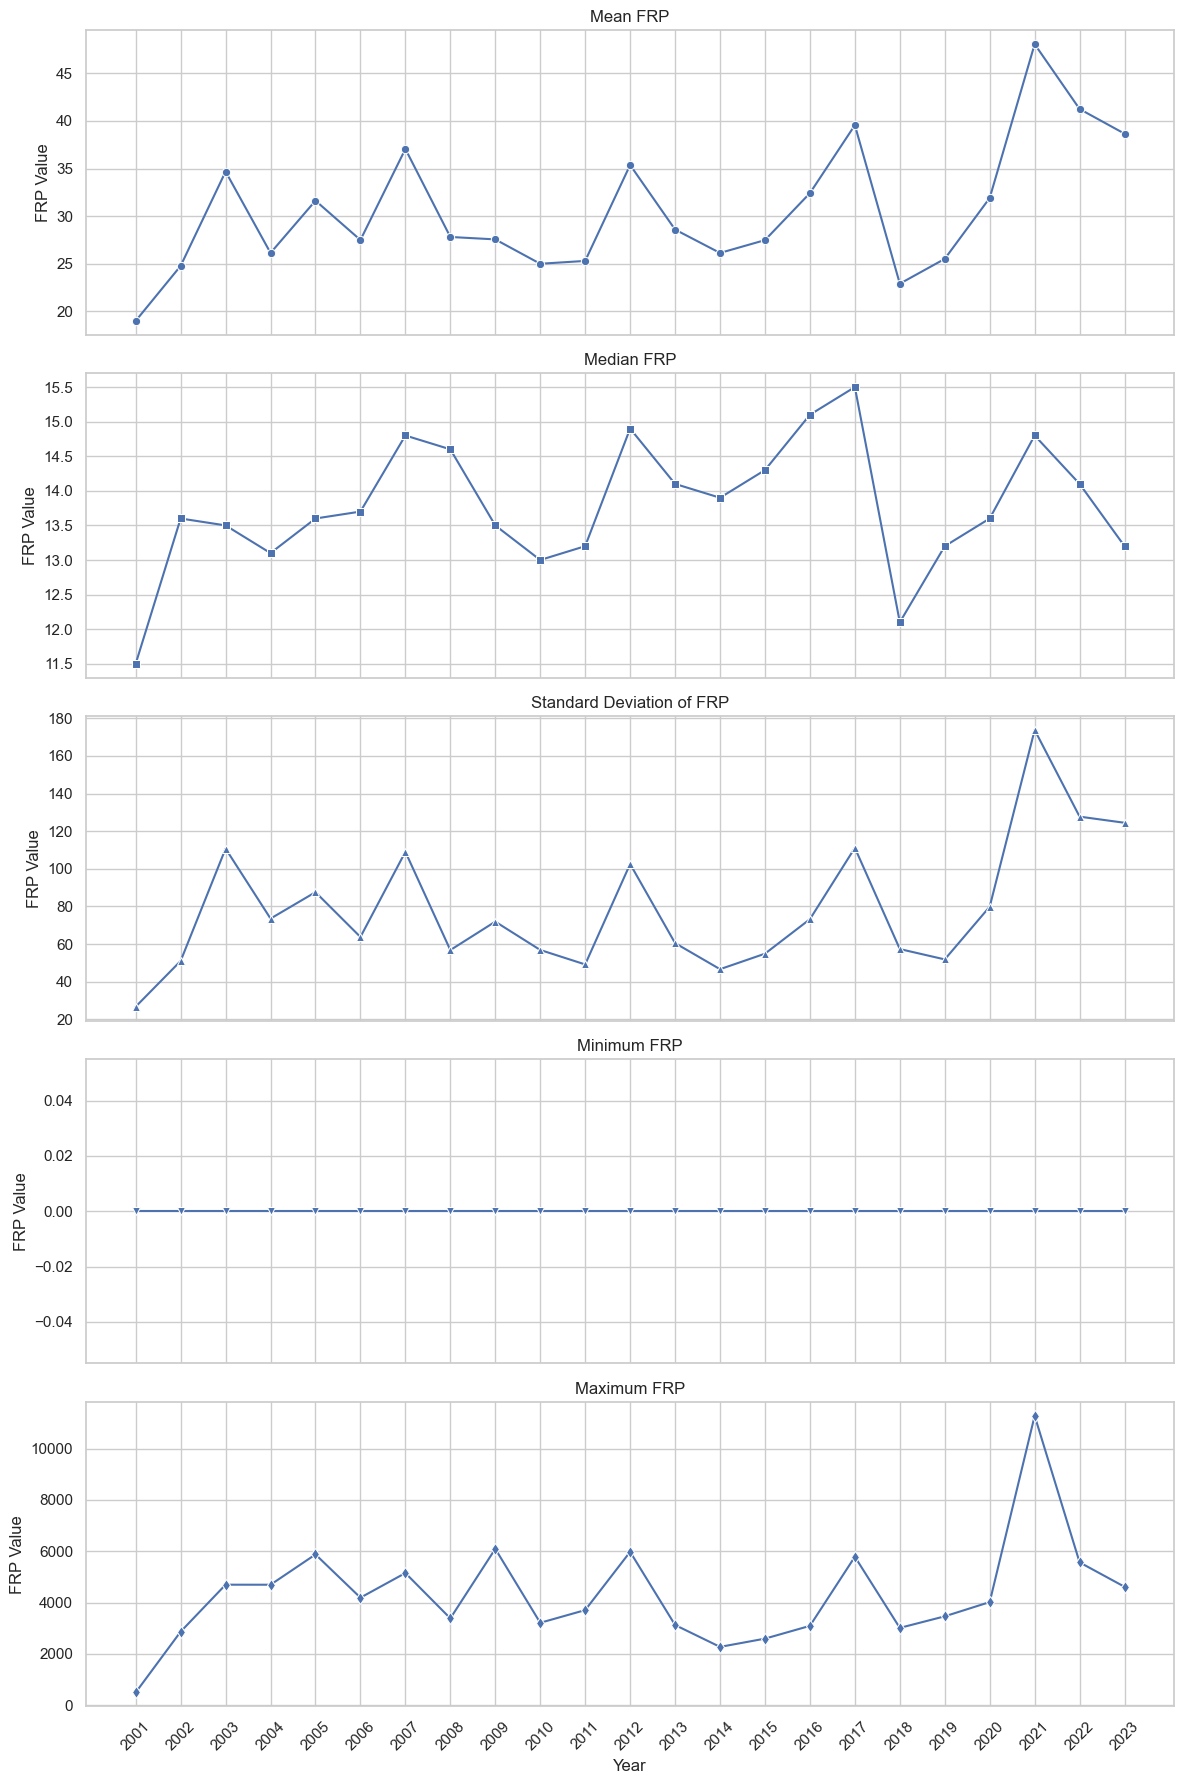

In [32]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create a figure with 5 subplots (stacked vertically)
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Define statistics and labels
stats = ['mean', 'median', 'std', 'min', 'max']
titles = ['Mean FRP', 'Median FRP', 'Standard Deviation of FRP', 'Minimum FRP', 'Maximum FRP']
markers = ['o', 's', '^', 'v', 'd']  # Different markers for distinction

# Loop through each statistic and create a separate plot
for i, stat in enumerate(stats):
    sns.lineplot(data=yearly_stats, x='year', y=stat, marker=markers[i], linestyle='-', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('FRP Value')
    axes[i].grid(True)

# Ensure all years are displayed on the x-axis
years = yearly_stats['year'].unique()
axes[-1].set_xticks(years)
axes[-1].set_xticklabels(years, rotation=45)  # Rotate labels for better visibility

# Set common X-axis label
axes[-1].set_xlabel('Year')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [33]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by month
monthly_stats = df.groupby(['year', 'month'])['frp'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Display the monthly statistics table
print(monthly_stats.head())


   year  month       mean  median        std  min     max
0  2001     10  16.935119    10.4  23.513264  2.0   494.3
1  2001     11  17.314214    11.7  18.786384  2.4   208.2
2  2001     12  36.270915    22.4  46.572533  0.0   494.3
3  2002      1  22.449766    14.5  23.159973  0.0   176.8
4  2002      2  22.668169    12.1  46.650195  2.4  1080.4


C:\Users\sofia\AppData\Local\Temp\ipykernel_15860\3902426683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats['date'] = pd.to_datetime(filtered_stats[['year', 'month']].assign(day=1))


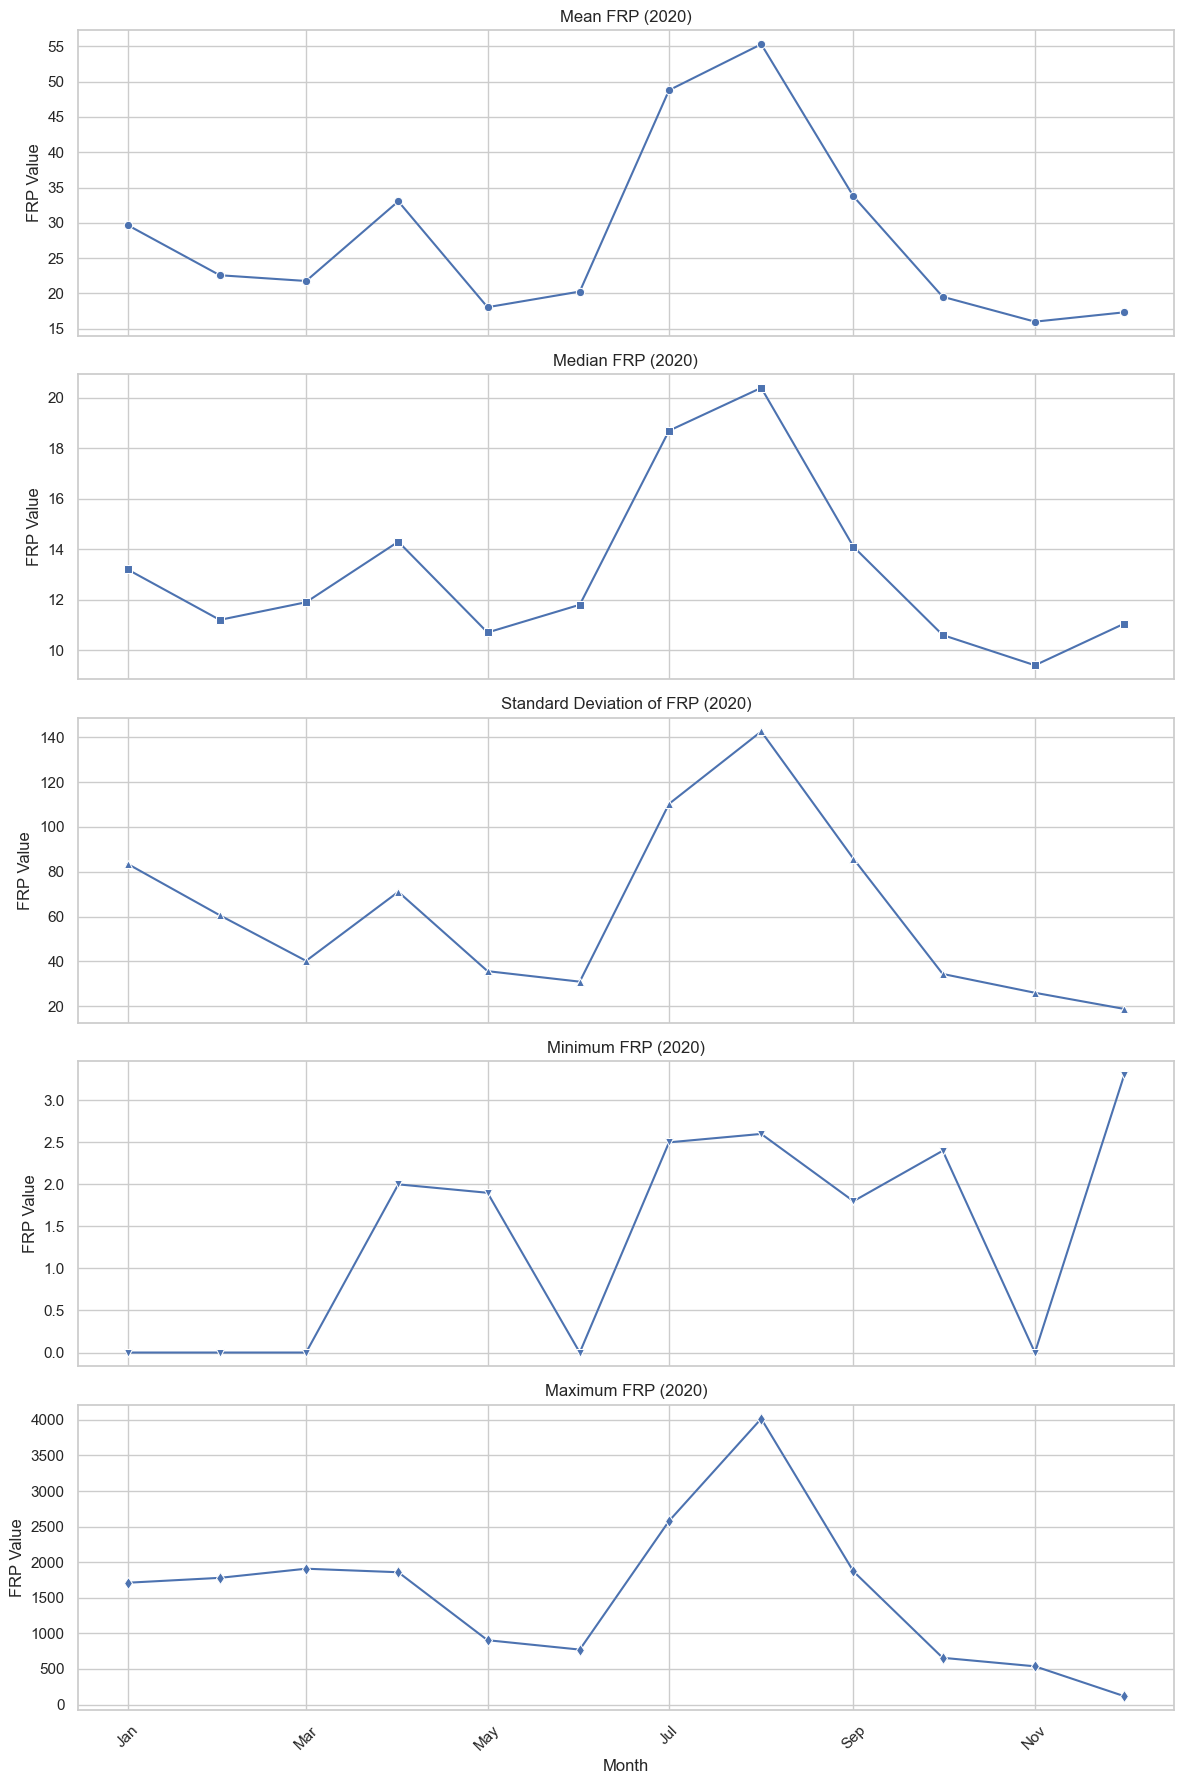

In [34]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Choose the year you want to visualize
selected_year = 2020  # Change this value to see different years

# Filter the data for the selected year
filtered_stats = monthly_stats[monthly_stats['year'] == selected_year]

# Create a new datetime column for proper plotting (Year-Month format)
filtered_stats['date'] = pd.to_datetime(filtered_stats[['year', 'month']].assign(day=1))

# Create figure with 5 subplots (stacked vertically)
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Define statistics and labels
stats = ['mean', 'median', 'std', 'min', 'max']
titles = [f'Mean FRP ({selected_year})', f'Median FRP ({selected_year})', 
          f'Standard Deviation of FRP ({selected_year})', 
          f'Minimum FRP ({selected_year})', f'Maximum FRP ({selected_year})']
markers = ['o', 's', '^', 'v', 'd']  # Different markers for distinction

# Loop through each statistic and create a separate plot
for i, stat in enumerate(stats):
    sns.lineplot(data=filtered_stats, x='date', y=stat, marker=markers[i], linestyle='-', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('FRP Value')
    axes[i].grid(True)

# Format x-axis to display months properly
axes[-1].set_xlabel('Month')
axes[-1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Format as month name (Jan, Feb, etc.)
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [35]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by day
daily_stats = df.groupby(['year', 'month', 'day'])['frp'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Display the daily statistics table
print(daily_stats.head())


   year  month  day       mean  median        std  min    max
0  2001     10    1  17.780899   14.10  11.432468  5.0   53.6
1  2001     10    2  14.909859   10.45  12.270366  3.8   79.1
2  2001     10    3  16.489623   11.50  16.086248  3.9  105.5
3  2001     10    4  19.632105   12.90  19.780196  3.9  164.3
4  2001     10    5  14.767532    9.50  15.092689  3.8  121.2


In [36]:
# Count the number of observations per year
yearly_counts = df.groupby('year').size().reset_index(name='count')

# Display the table of observations per year
print(yearly_counts.head())


   year  count
0  2001   6517
1  2002  85451
2  2003  81161
3  2004  78259
4  2005  86861


In [37]:
# Count the number of observations per month (group by year and month)
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

# Display the table of observations per month
print(monthly_counts.head())


   year  month  count
0  2001     10   4647
1  2001     11   1203
2  2001     12    667
3  2002      1    428
4  2002      2   1376


In [38]:
# Count the number of observations per day (group by year, month, and day)
daily_counts = df.groupby(['year', 'month', 'day']).size().reset_index(name='count')

# Display the table of observations per day
print(daily_counts.head())


   year  month  day  count
0  2001     10    1     89
1  2001     10    2    142
2  2001     10    3    212
3  2001     10    4    190
4  2001     10    5    154
